Estaremos construyendo la clase principal o tambien llamada ***parent*** para nuestra estrategia Iterativa, que nos servira como plataforma principal donde podremos hacer el backtesting de cualquier tipo de estrategia.

Luego crearemos lo que se llama: clases ***child***, que serán las clases donde programaremos las estrategias donde estaran  definidos los parametros específicos para cada estrategia.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('ggplot')

In [8]:
class TesterBase():
  def __init__(self, simbolo, inicio, final, monto):
    self.simbolo = simbolo
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_final = monto
    self.obtener_data()
  
  def obtener_data(self):
    ruta_data = '/content/drive/MyDrive/Colab Notebooks/[data_sets]/daily/EURUSD.csv'
    raw = pd.read_csv(ruta_data, parse_dates = ['Gmt time'], index_col = 'Gmt time').dropna()
    raw = raw.loc[self.inicio : self.final]
    raw['retornos'] = raw['Price'].pct_change()
    self.data = raw
  
  def plotear_data(self, cols=None):
    if cols is None:
      cols = 'Price'
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

In [43]:
bkbase = TesterBase('EURUSD=X', '2017-01-31', '2022-03-05', 10000)

In [42]:
bkbase.data = bkbase.data.drop('retornos', axis=1)

In [44]:
bkbase.data.head(2)

,Close_Ask,Close_Bid,Spread,Price,retornos
Gmt time,,,,,
2017-01-31 22:00:00,1.07695,1.07681,0.0014,1.07688,NaN
2017-02-01 22:00:00,1.07584,1.07578,0.0006,1.07581,-0.000994


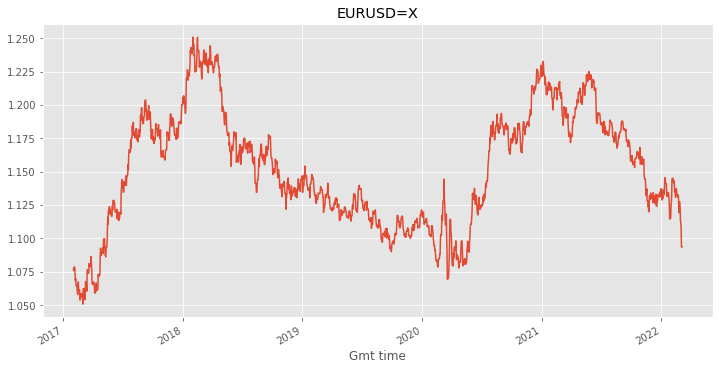

In [45]:
bkbase.plotear_data()

# El método **obtener_valores** *(por index)*

In [46]:
class TesterBase():
  def __init__(self, simbolo, inicio, final, monto):
    self.simbolo = simbolo
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_final = monto
    self.obtener_data()
  
  def obtener_data(self):
    ruta_data = '/content/drive/MyDrive/Colab Notebooks/[data_sets]/daily/EURUSD.csv'
    raw = pd.read_csv(ruta_data, parse_dates = ['Gmt time'], index_col = 'Gmt time').dropna()
    raw = raw.loc[self.inicio : self.final]
    raw['retornos'] = raw['Price'].pct_change()
    self.data = raw
  
  def obtener_valores_por_index(self, vela):
    date = str(self.data.index[vela].date())
    precio = round(self.data['Price'].iloc[vela], 5)
    spread = round(self.data['Spread'].iloc[vela], 5)
    return date, precio, spread
  
  def plotear_data(self, cols=None):
    if cols is None:
      cols = 'Price'
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

In [47]:
bkbase = TesterBase('EURUSD=X', '2017-01-31', '2022-03-05', 10000)

In [49]:
# El indice del DataFrame es tomado como Parametro
# entonces '-1' devolverá el último valor del dataframe
bkbase.obtener_valores_por_index(-1)

('2022-03-05', 1.09348, 0.0075)

In [50]:
bkbase.data.tail()

,Close_Ask,Close_Bid,Spread,Price,retornos
Gmt time,,,,,
2022-03-01 22:00:00,1.11191,1.11179,0.0012,1.111850,-0.000634
2022-03-02 22:00:00,1.10674,1.10658,0.0016,1.106660,-0.004668
2022-03-03 22:00:00,1.09386,1.09311,0.0075,1.093485,-0.011905
2022-03-04 22:00:00,1.09386,1.09311,0.0075,1.093485,0.000000
2022-03-05 22:00:00,1.09386,1.09311,0.0075,1.093485,0.000000


# El método **print_balance**

In [54]:
class TesterBase():
  def __init__(self, simbolo, inicio, final, monto):
    self.simbolo = simbolo
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_actual = monto
    self.obtener_data()
  
  def obtener_data(self):
    ruta_data = '/content/drive/MyDrive/Colab Notebooks/[data_sets]/daily/EURUSD.csv'
    raw = pd.read_csv(ruta_data, parse_dates = ['Gmt time'], index_col = 'Gmt time').dropna()
    raw = raw.loc[self.inicio : self.final]
    raw['retornos'] = raw['Price'].pct_change()
    self.data = raw
  
  def obtener_valores_por_index(self, vela):
    date = str(self.data.index[vela].date())
    precio = round(self.data['Price'].iloc[vela], 5)
    spread = round(self.data['Spread'].iloc[vela], 5)
    return date, precio, spread
  
  def imprimir_balance_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print('{} | Balance Inicial: {}'.format(self.inicio, round(self.balance_inicial, 2)))
    print('{} | Balance Actual: {}'.format(date, self.balance_actual))

  def plotear_data(self, cols=None):
    if cols is None:
      cols = 'Price'
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

In [55]:
bkbase = TesterBase('EURUSD=X', '2017-01-31', '2022-03-05', 10000)

In [56]:
# En el primer dia (indice 0) obtenemos el mismo saldo en el cual comenzamos
bkbase.imprimir_balance_actual(0)

2017-01-31 | Balance Inicial: 10000
2017-01-31 | Balance Actual: 10000


In [58]:
# En el ultimo dia (indice -1) obtenemos el mismo Saldo que iniciamos (ya que aun no hemos realizado ningun Trade aun)
bkbase.imprimir_balance_actual(-1)

2017-01-31 | Balance Inicial: 10000
2022-03-05 | Balance Actual: 10000


# El método **comprar_instrumento** 

Necesitamos agregar los siguientes parámetros al comienzo de la clase:
- self.unidades_en_activos
- self.trades

In [80]:
class TesterBase():
  def __init__(self, simbolo, inicio, final, monto):
    self.simbolo = simbolo
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_actual = monto
    self.unidades_en_activos = 0 # Cuenta cuántas unidades tenemos en Long o Short sobre un activo.
    self.trades = 0 # Cuenta los Trades (esto nos ayuda a saber si la estrategia es costo/eficiente o no)
    self.obtener_data()

  def obtener_data(self):
    ruta_data = '/content/drive/MyDrive/Colab Notebooks/[data_sets]/daily/EURUSD.csv'
    raw = pd.read_csv(ruta_data, parse_dates=['Gmt time'], index_col="Gmt time").dropna()
    raw = raw.loc[self.inicio : self.final]
    raw['retornos']   = raw['Price'].pct_change()
    self.data = raw 

  def obtener_valores_por_index(self, vela):
    date = str(self.data.index[vela].date())
    precio = round(self.data['Price'].iloc[vela], 5)
    spread = round(self.data['Spread'].iloc[vela], 5)
    return date, precio, spread

  def imprimir_balance_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print("{} | Balance Inicial: {}".format(self.inicio, round(self.balance_inicial, 2)))
    print("{} | Balance Actual: {}".format(date, self.balance_actual))

  def comprar_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    
    # Usa 'unidades_en_activos' solamente si es pasado un valor en este parametro, de lo contrario, calcula este valor.
    if monto is not None: 
      unidades_en_activos = int(monto / precio) # Convierte el resultado a 'int' para evitar la compra de decimales de un activo.
    self.balance_actual -= unidades_en_activos * precio # Reduce el 'balance_actual' por el precio de compra del activo.
    self.unidades_en_activos += unidades_en_activos # Actualiza 'unidades_en_activos'
    self.trades += 1
    print("{} | Comprando: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def plotear_data(self, cols=None):
    if cols is None:
      cols = "Price"
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

In [81]:
bkbase = TesterBase('EURUSD', '2017-01-31', '2022-03-05', 10000)

In [82]:
bkbase.imprimir_balance_actual(0)

2017-01-31 | Balance Inicial: 10000
2017-01-31 | Balance Actual: 10000


In [83]:
# El primer dia compramos 1000 unidades del activo/instrumento
bkbase.comprar_instrumento(0, unidades_en_activos=1000)

2017-01-31 | Comprando: 1000, EURUSD, por: 1.07688


In [84]:
bkbase.unidades_en_activos

1000

In [85]:
bkbase.imprimir_balance_actual(0)

2017-01-31 | Balance Inicial: 10000
2017-01-31 | Balance Actual: 8923.119999999999


In [86]:
10000 - 1000 * 1.07688

8923.119999999999

In [87]:
# El segundo dia, compramos las unidades del activo que podemos obtener con $5000
bkbase.comprar_instrumento(1, monto=5000)

2017-02-01 | Comprando: 4647, EURUSD, por: 1.07581


In [88]:
int(5000/1.07581)

4647

In [89]:
bkbase.imprimir_balance_actual(1)

2017-01-31 | Balance Inicial: 10000
2017-02-01 | Balance Actual: 3923.830929999999


# Los métodos: **imprimir_valor_de_posicion_actual** e **imprimir_valor_neto_del_activo**

El método **imprimir_valor_neto_del_activo**, es el monto de $ que tenemos en total, sumando el saldo cash + la tenencia de nuestro instrumento (comprado o vendido, o si se valora o devalúa en cada vela)

In [90]:
class TesterBase():
  def __init__(self, simbolo, inicio, final, monto):
    self.simbolo = simbolo
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_actual = monto
    self.unidades_en_activos = 0 # Cuenta cuántas unidades tenemos en Long o Short sobre un activo.
    self.trades = 0 # Cuenta los Trades (esto nos ayuda a saber si la estrategia es costo/eficiente o no)
    self.obtener_data()

  def obtener_data(self):
    ruta_data = '/content/drive/MyDrive/Colab Notebooks/[data_sets]/daily/EURUSD.csv'
    raw = pd.read_csv(ruta_data, parse_dates=['Gmt time'], index_col="Gmt time").dropna()
    raw = raw.loc[self.inicio : self.final]
    raw['retornos']   = raw['Price'].pct_change()
    self.data = raw 

  def obtener_valores_por_index(self, vela):
    date = str(self.data.index[vela].date())
    precio = round(self.data['Price'].iloc[vela], 5)
    spread = round(self.data['Spread'].iloc[vela], 5)
    return date, precio, spread

  def imprimir_balance_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print("{} | Balance Inicial: {}".format(self.inicio, round(self.balance_inicial, 2)))
    print("{} | Balance Actual: {}".format(date, self.balance_actual))

  def comprar_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    
    # Usa 'unidades_en_activos' solamente si es pasado un valor en este parametro, de lo contrario, calcula este valor.
    if monto is not None: 
      unidades_en_activos = int(monto / precio) # Convierte el resultado a 'int' para evitar la compra de decimales de un activo.
    self.balance_actual -= unidades_en_activos * precio # Reduce el 'balance_actual' por el precio de compra del activo.
    self.unidades_en_activos += unidades_en_activos # Actualiza 'unidades_en_activos'
    self.trades += 1
    print("{} | Comprando: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def imprimir_valor_posicion(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    valor_pos_act = self.unidades_en_activos * precio
    print('{} | Valor de la Posicion Actual: {}'.format(date, valor_pos_act))
  
  def imprimir_valor_neto_del_activo(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    net_asset_value = self.balance_actual + (self.unidades_en_activos * precio)
    print('{} | Valor Neto Actual: {}'.format(date, net_asset_value))
  
  def plotear_data(self, cols=None):
    if cols is None:
      cols = "Price"
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

In [91]:
bkbase = TesterBase('EURUSD', '2017-01-31', '2022-03-05', 10000)

In [92]:
bkbase.imprimir_balance_actual(0)

2017-01-31 | Balance Inicial: 10000
2017-01-31 | Balance Actual: 10000


In [93]:
bkbase.comprar_instrumento(0, unidades_en_activos=1000)

2017-01-31 | Comprando: 1000, EURUSD, por: 1.07688


In [94]:
bkbase.unidades_en_activos

1000

In [95]:
bkbase.imprimir_balance_actual(0)

2017-01-31 | Balance Inicial: 10000
2017-01-31 | Balance Actual: 8923.119999999999


In [96]:
bkbase.imprimir_valor_posicion(0)

2017-01-31 | Valor de la Posicion Actual: 1076.88


In [97]:
bkbase.imprimir_valor_neto_del_activo(0)

2017-01-31 | Valor Neto Actual: 10000.0


In [98]:
bkbase.imprimir_valor_posicion(1)

2017-02-01 | Valor de la Posicion Actual: 1075.81


In [99]:
bkbase.imprimir_valor_neto_del_activo(1)

2017-02-01 | Valor Neto Actual: 9998.929999999998


In [100]:
bkbase.comprar_instrumento(1, monto = 5000)

2017-02-01 | Comprando: 4647, EURUSD, por: 1.07581


In [101]:
bkbase.imprimir_balance_actual(1)

2017-01-31 | Balance Inicial: 10000
2017-02-01 | Balance Actual: 3923.830929999999


In [102]:
bkbase.imprimir_valor_posicion(1)

2017-02-01 | Valor de la Posicion Actual: 6075.099069999999


In [107]:
bkbase.imprimir_valor_neto_del_activo(5)

2017-02-05 | Valor Neto Actual: 9994.242989999999


# El método **vender_instrumento**

In [111]:
class TesterBase():
  def __init__(self, simbolo, inicio, final, monto):
    self.simbolo = simbolo
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_actual = monto
    self.unidades_en_activos = 0 # Cuenta cuántas unidades tenemos en Long o Short sobre un activo.
    self.trades = 0 # Cuenta los Trades (esto nos ayuda a saber si la estrategia es costo/eficiente o no)
    self.obtener_data()

  def obtener_data(self):
    ruta_data = '/content/drive/MyDrive/Colab Notebooks/[data_sets]/daily/EURUSD.csv'
    raw = pd.read_csv(ruta_data, parse_dates=['Gmt time'], index_col="Gmt time").dropna()
    raw = raw.loc[self.inicio : self.final]
    raw['retornos']   = raw['Price'].pct_change()
    self.data = raw 

  def obtener_valores_por_index(self, vela):
    date = str(self.data.index[vela].date())
    precio = round(self.data['Price'].iloc[vela], 5)
    spread = round(self.data['Spread'].iloc[vela], 5)
    return date, precio, spread

  def imprimir_balance_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print("{} | Balance Inicial: {}".format(self.inicio, round(self.balance_inicial, 2)))
    print("{} | Balance Actual: {}".format(date, self.balance_actual))

  def comprar_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    
    # Usa 'unidades_en_activos' solamente si es pasado un valor en este parametro, de lo contrario, calcula este valor.
    if monto is not None: 
      unidades_en_activos = int(monto / precio) # Convierte el resultado a 'int' para evitar la compra de decimales de un activo.
    self.balance_actual -= unidades_en_activos * precio # Reduce el 'balance_actual' por el precio de compra del activo.
    self.unidades_en_activos += unidades_en_activos # Actualiza 'unidades_en_activos'
    self.trades += 1
    print("{} | Comprando: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def vender_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if monto is not None:
      unidades_en_activos = int(monto/precio)
    self.balance_actual += unidades_en_activos * precio
    self.unidades_en_activos -= unidades_en_activos
    self.trades += 1
    print('{} | Vendiendo: {}, {}, por: {}'.format(date, unidades_en_activos, self.simbolo, precio))

  def imprimir_valor_posicion(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    valor_pos_act = self.unidades_en_activos * precio
    print('{} | Valor de la Posicion Actual: {}'.format(date, valor_pos_act))
  
  def imprimir_valor_neto_del_activo(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    net_asset_value = self.balance_actual + (self.unidades_en_activos * precio)
    print('{} | Valor Neto Actual: {}'.format(date, net_asset_value))
  
  def plotear_data(self, cols=None):
    if cols is None:
      cols = "Price"
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

In [112]:
bkbase = TesterBase('EURUSD', '2017-01-31', '2022-03-05', 10000)

In [114]:
bkbase.comprar_instrumento(0, unidades_en_activos=1000)

2017-01-31 | Comprando: 1000, EURUSD, por: 1.07688


In [115]:
bkbase.unidades_en_activos

1000

In [116]:
bkbase.imprimir_valor_posicion(1)

2017-02-01 | Valor de la Posicion Actual: 1075.81


In [117]:
bkbase.imprimir_valor_neto_del_activo(1)

2017-02-01 | Valor Neto Actual: 9998.929999999998


In [118]:
bkbase.vender_instrumento(1, unidades_en_activos=2000)

2017-02-01 | Vendiendo: 2000, EURUSD, por: 1.07581


In [119]:
bkbase.unidades_en_activos

-1000

In [121]:
bkbase.imprimir_balance_actual(1)

2017-01-31 | Balance Inicial: 10000
2017-02-01 | Balance Actual: 11074.739999999998


In [120]:
bkbase.imprimir_valor_posicion(1)

2017-02-01 | Valor de la Posicion Actual: -1075.81


In [123]:
bkbase.comprar_instrumento(1, unidades_en_activos=1000)

2017-02-01 | Comprando: 1000, EURUSD, por: 1.07581


In [125]:
bkbase.imprimir_valor_posicion(1)

2017-02-01 | Valor de la Posicion Actual: 0.0


Tengamos en cuenta que el último resultado de *valor_de_la_posicion_actual*, nos dio un **valor negativo** porque es un Trade en short, por lo que hemos 'vendido' activos que necesitamos volver a comprar (para cerrar la posición)

In [122]:
bkbase.imprimir_valor_neto_del_activo(1)

2017-02-01 | Valor Neto Actual: 9998.929999999998


# El metodo **cerrar_posicion**

In [128]:
class TesterBase():
  def __init__(self, simbolo, inicio, final, monto):
    self.simbolo = simbolo
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_actual = monto
    self.unidades_en_activos = 0 
    self.trades = 0      
    self.obtener_data()

  def obtener_data(self):
    ruta_data = '/content/drive/MyDrive/Colab Notebooks/[data_sets]/daily/EURUSD.csv'
    raw = pd.read_csv(ruta_data, parse_dates=['Gmt time'], index_col="Gmt time").dropna()
    raw = raw.loc[self.inicio : self.final]
    raw['retornos']   = raw['Price'].pct_change()
    self.data = raw 

  def obtener_valores_por_index(self, vela):
    date = str(self.data.index[vela].date())
    precio = round(self.data['Price'].iloc[vela], 5)
    spread = round(self.data['Spread'].iloc[vela], 5)
    return date, precio, spread

  def imprimir_balance_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print("{} | Balance Inicial: {}".format(self.inicio, round(self.balance_inicial, 2)))
    print("{} | Balance Actual: {}".format(date, self.balance_actual))

  def comprar_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if monto is not None: 
      unidades_en_activos = int(monto / precio) 
    self.balance_actual -= unidades_en_activos * precio 
    self.unidades_en_activos += unidades_en_activos
    self.trades += 1
    print("{} | Comprando: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def vender_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if monto is not None: 
      unidades_en_activos = int(monto / precio) 
    self.balance_actual += unidades_en_activos * precio 
    self.unidades_en_activos -= unidades_en_activos
    self.trades += 1
    print("{} | Vendiendo: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def imprimir_valor_de_posicion_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    valor_pos_act = self.unidades_en_activos * precio
    print("{} | Valor de la posicion actual: {}".format(date, valor_pos_act))

  def imprimir_valor_neto_del_activo(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    valor_neto_act = self.balance_actual + (self.unidades_en_activos * precio)
    print("{} | Valor Neto Actual: {}".format(date, valor_neto_act))

  def cerrar_posicion(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print(100 * "-") 
    print("{} | \-\-\-\-\-\ FINAL DEL BACKTEST /-/-/-/-/-/". format(date))
    self.balance_actual += self.unidades_en_activos * precio # Cierra la posicion actual (Long o Short)
    print("{} | Cerrando posicion de: {} | por: {}".format(date, self.unidades_en_activos, precio))
    self.unidades_en_activos = 0 # Actualiza la posicion como neutral
    self.trades += 1
    perf = (self.balance_actual - self.balance_inicial) / self.balance_inicial * 100 # Porcentaje de rendimiento
    self.imprimir_balance_actual(vela)
    print("{} | Rendimiento Neto (%): {}".format(date, perf))
    print("{} | Numero de Trades: {}".format(date, self.trades))
    print(100 * "-")

  def plotear_data(self, cols=None):
    if cols is None:
      cols = "Price"
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

In [129]:
bkbase = TesterBase('EURUSD', '2017-01-31', '2022-03-05', 10000)

In [130]:
bkbase.comprar_instrumento(0, monto = 1000)

2017-01-31 | Comprando: 928, EURUSD, por: 1.07688


In [131]:
bkbase.imprimir_balance_actual(0)

2017-01-31 | Balance Inicial: 10000
2017-01-31 | Balance Actual: 9000.65536


In [132]:
bkbase.imprimir_valor_de_posicion_actual(0)

2017-01-31 | Valor de la posicion actual: 999.34464


Observemos el último resultado. Si comprobamos el valor de la posición al final del dataframe utilizando el índice '-1' (sin hacer ningún otro Trade), veremos un valor diferente, esto es porque el método ***imprimir_valor_de_posicion_actual*** toma en cuenta la apreciación o depreciación del instrumento (en este caso EURUSD)

In [134]:
bkbase.imprimir_balance_actual(-1)

2017-01-31 | Balance Inicial: 10000
2022-03-05 | Balance Actual: 9000.65536


In [133]:
bkbase.imprimir_valor_de_posicion_actual(-1)

2022-03-05 | Valor de la posicion actual: 1014.74944


In [135]:
bkbase.imprimir_valor_neto_del_activo(-1)

2022-03-05 | Valor Neto Actual: 10015.4048


Ahora cerremos la posición al final del dataframe:

In [136]:
bkbase.cerrar_posicion(-1)

----------------------------------------------------------------------------------------------------
2022-03-05 | \-\-\-\-\-\ FINAL DEL BACKTEST /-/-/-/-/-/
2022-03-05 | Cerrando posicion de: 928 | por: 1.09348
2017-01-31 | Balance Inicial: 10000
2022-03-05 | Balance Actual: 10015.4048
2022-03-05 | Rendimiento Neto (%): 0.15404800000000252
2022-03-05 | Numero de Trades: 2
----------------------------------------------------------------------------------------------------


# Incluyendo **Spread** a la estrategia

Aquí necesitamos hacer uso del Spread, así que lo agregaremos como un nuevo parámetro en la clase principal, y también como un atributo.

También necesitamos modificar los métodos:
- comprar_instrumento()
- vender_instrumento()
- cerrar_posicion()

También ***redondearemos*** los valores al final del informe.

In [15]:
class TesterBase():
  def __init__(self, simbolo, inicio, final, monto, usar_spread=True):
    self.simbolo = simbolo
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_actual = monto
    self.unidades_en_activos = 0 
    self.trades = 0      
    self.usar_spread = usar_spread
    self.obtener_data()

  def obtener_data(self):
    ruta_data = '/content/drive/MyDrive/Colab Notebooks/[data_sets]/daily/EURUSD.csv'
    raw = pd.read_csv(ruta_data, parse_dates=['Gmt time'], index_col="Gmt time").dropna()
    raw = raw.loc[self.inicio : self.final]
    raw['retornos']   = raw['Price'].pct_change()
    self.data = raw 

  def obtener_valores_por_index(self, vela):
    date = str(self.data.index[vela].date())
    precio = round(self.data['Price'].iloc[vela], 5)
    spread = round(self.data['Spread'].iloc[vela], 5)
    return date, precio, spread

  def imprimir_balance_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print("{} | Balance Inicial: {}".format(self.inicio, round(self.balance_inicial, 2)))
    print("{} | Balance Actual: {}".format(date, round(self.balance_actual, 2)))

  def comprar_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if self.usar_spread:
      precio += spread/2 # Precio ASK
    if monto is not None: 
      unidades_en_activos = int(monto / precio) 
    self.balance_actual -= unidades_en_activos * precio
    self.unidades_en_activos += unidades_en_activos
    self.trades += 1
    print("{} | Comprando: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def vender_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if self.usar_spread:
      precio -= spread/2 # Precio BID 
    if monto is not None: 
      unidades_en_activos = int(monto / precio)
    self.balance_actual += unidades_en_activos * precio
    self.unidades_en_activos -= unidades_en_activos
    self.trades += 1
    print("{} | Vendiendo: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def imprimir_valor_de_posicion_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    valor_pos_act = self.unidades_en_activos * precio
    print("{} | Valor de la posicion actual: {}".format(date, valor_pos_act))

  def imprimir_valor_neto_del_activo(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    valor_neto_act = self.balance_actual + (self.unidades_en_activos * precio)
    print("{} | Valor Neto Actual: {}".format(date, valor_neto_act))

  def cerrar_posicion(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print(100 * "-")
    print("{} | \-\-\-\-\-\ FINAL DEL BACKTEST /-/-/-/-/-/". format(date))
    self.balance_actual += self.unidades_en_activos * precio 
    self.balance_actual -= (abs(self.unidades_en_activos) * (spread / 2) * self.usar_spread)
    print("{} | Cerrando posicion de: {} | por: {}".format(date, self.unidades_en_activos, precio))
    self.unidades_en_activos = 0 
    self.trades += 1
    perf = (self.balance_actual - self.balance_inicial) / self.balance_inicial * 100 
    self.imprimir_balance_actual(vela)
    print("{} | Rendimiento Neto (%): {}".format(date, round(perf, 2)))
    print("{} | Numero de Trades: {}".format(date, self.trades))
    print(100 * "-") 

  def plotear_data(self, cols=None):
    if cols is None:
      cols = "Price"
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

In [6]:
bkbase = TesterBase('EURUSD', '2017-01-31', '2022-03-05', 10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
bkbase.comprar_instrumento(0, monto = 10000)

2017-01-31 | Comprando: 9280, EURUSD, por: 1.07758


In [10]:
bkbase.imprimir_valor_neto_del_activo(0)

2017-01-31 | Valor Neto Actual: 9993.504


Ahora vemos que el valor neto del instrumento ha disminuido debido a costos del Trade (Spread)

In [11]:
bkbase.imprimir_balance_actual(0)

2017-01-31 | Balance Inicial: 10000
2017-01-31 | Balance Actual: 0.06


In [12]:
bkbase.data.loc['2017-12-31']

,Close_Ask,Close_Bid,Spread,Price,retornos
Gmt time,,,,,
2017-12-31 22:00:00,1.20075,1.19985,0.009,1.2003,0.0


Notamos que el spread en esa fecha es de unos 9 pips (bastante alto), ahora calculemos cuánto nos costó ese spread.

In [13]:
bkbase.data['Spread'][0]/2 * 9280 # '9280' es la cantidad de activos que hemos comprado

6.496000000000928

Ese spread nos ha costado alrededor de $6.49

In [14]:
# Cierra la posicion en el ultimo dia del dataframe
bkbase.cerrar_posicion(-1)

----------------------------------------------------------------------------------------------------
2022-03-05 | \-\-\-\-\-\ FINAL DEL BACKTEST /-/-/-/-/-/
2022-03-05 | Cerrando posicion de: 9280 | por: 1.09348
2017-01-31 | Balance Inicial: 10000
2022-03-05 | Balance Actual: 10112.75
2022-03-05 | Rendimiento Neto (%): 1.13
2022-03-05 | Numero de Trades: 2
----------------------------------------------------------------------------------------------------


# Creando de la clase secundaria (child)

Esta *clase secundaria* nos permitirá probar estrategias específicas utilizando la clase principal (parent) ya creada.

Pero primero necesitamos modificar la clase *parent* o principal (**TesterBase**), con lo siguiente:

- Agregar el atributo **posicion**

- Agregar el metodo **Medidores_de_Riesgo**

In [28]:
class TesterBase():
  def __init__(self, simbolo, inicio, final, monto, usar_spread=True):
    self.simbolo = simbolo
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_actual = monto
    self.unidades_en_activos = 0 
    self.trades = 0      
    self.posicion = 0 # Agregamos 'posicion' que lo estaremos utilizando en la clase child
    self.usar_spread = usar_spread
    self.obtener_data()

  def obtener_data(self):
    ruta_data = '/content/drive/MyDrive/Colab Notebooks/[data_sets]/daily/EURUSD.csv'
    raw = pd.read_csv(ruta_data, parse_dates=['Gmt time'], index_col="Gmt time").dropna()
    raw = raw.loc[self.inicio : self.final]
    raw['retornos']   = raw['Price'].pct_change()
    self.data = raw 

  def obtener_valores_por_index(self, vela):
    date = str(self.data.index[vela].date())
    precio = round(self.data['Price'].iloc[vela], 5)
    spread = round(self.data['Spread'].iloc[vela], 5)
    return date, precio, spread

  def imprimir_balance_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print("{} | Balance Inicial: {}".format(self.inicio, round(self.balance_inicial, 2)))
    print("{} | Balance Actual: {}".format(date, round(self.balance_actual, 2)))

  def comprar_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if self.usar_spread:
      precio += spread/2 
    if monto is not None: 
      unidades_en_activos = int(monto / precio) 
    self.balance_actual -= unidades_en_activos * precio 
    self.unidades_en_activos += unidades_en_activos
    self.trades += 1
    print("{} | Comprando: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def vender_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if self.usar_spread:
      precio -= spread/2 
    if monto is not None: 
      unidades_en_activos = int(monto / precio) 
    self.balance_actual += unidades_en_activos * precio 
    self.unidades_en_activos -= unidades_en_activos
    self.trades += 1
    print("{} | Vendiendo: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def imprimir_valor_de_posicion_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    valor_pos_act = self.unidades_en_activos * precio
    print("{} | Valor de la posicion actual: {}".format(date, valor_pos_act))

  def imprimir_valor_neto_del_activo(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    valor_neto_act = self.balance_actual + (self.unidades_en_activos * precio)
    print("{} | Valor Neto Actual: {}".format(date, valor_neto_act))

  def cerrar_posicion(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print(100 * "-") 
    print("{} | \-\-\-\-\-\ FINAL DEL BACKTEST /-/-/-/-/-/". format(date))
    self.balance_actual += self.unidades_en_activos * precio 
    self.balance_actual -= (abs(self.unidades_en_activos) * (spread / 2) * self.usar_spread)
    print("{} | Cerrando ultima posicion de: {} | por: {}".format(date, self.unidades_en_activos, precio))
    self.unidades_en_activos = 0 
    self.trades += 1
    perf = (self.balance_actual - self.balance_inicial) / self.balance_inicial * 100 
    self.imprimir_balance_actual(vela)
    print("{} | Rendimiento Neto (%): {}".format(date, round(perf, 2)))
    print("{} | Numero de Trades: {}".format(date, self.trades))
    print(100 * "-") 

  # Performance de la Estrategia
  def Medidores_de_Riesgo(self):
    df = self.data.copy().dropna()
    riskfree_rate = 0.022

    # Prepara los datos que son necesarios para el uso del metodo 'Medidores_de_Riesgo'
    df['instrumento_retornos']   = df['Price'].pct_change()
    df['estrategia_retornos'] = df['Posicion'].shift(1) * df['instrumento_retornos']
    # df.dropna(inplace=True)
    df['instrumento_retornos_acum'] = df['instrumento_retornos'].cumsum().apply(np.exp)
    df['estrategia_retornos_acum'] = df['estrategia_retornos'].cumsum().apply(np.exp)

    # Performance Absoluto ----------------------------------------------------/
    perf = df['estrategia_retornos_acum'].iloc[-1] 
    # % Superado --------------------------------------------------------------/
    pct_superado = perf - df['instrumento_retornos_acum'].iloc[-1] 
    # CAGR --------------------------------------------------------------------/
    numero_de_anios = len(df)/252 
    CAGR = (df['estrategia_retornos_acum'][-1])**(1/numero_de_anios) -1 
    # Volatilidad Anual -------------------------------------------------------/
    vol = df['instrumento_retornos'].std()* np.sqrt(252) 
    # Sharpe Ratio ------------------------------------------------------------/
    sharpe_ratio = (CAGR - riskfree_rate) / vol
    # Sortino Ratio -----------------------------------------------------------/
    neg_vol = df[df['instrumento_retornos'] < 0]['instrumento_retornos'].std()* np.sqrt(252) 
    sortino_ratio = (CAGR - riskfree_rate) / neg_vol
    # MDD ---------------------------------------------------------------------/
    df['max_ret_acum'] = df['estrategia_retornos_acum'].cummax()
    df['drawdown']     = df['max_ret_acum'] - df['estrategia_retornos_acum']
    df['drawdown_pct'] = df['drawdown'] / df['max_ret_acum']
    mdd                = df['drawdown_pct'].max()
    # Calmar Ratio ------------------------------------------------------------/
    calmar = CAGR / mdd
    # Imprime los valores con su respectivo texto -----------------------------/
    print("RENDIMIENTO DE LA ESTRATEGIA")
    print("-" * 100)
    print("% Superado al Benchmark:__" + str(round((pct_superado*100), 2)) + "%")
    print("CAGR (Rendimiento Anual)__" + str(round((CAGR*100), 2)) + "%")
    print("Volatilidad Anual:________" + str(round((vol*100), 2)) + "%")
    print("Maximum Drawdown:_________" + str(round((mdd*100), 2)) + "%")
    print("Sharpe R._________________" + str(round(sharpe_ratio, 2)))
    print("Sortino R.________________" + str(round(sortino_ratio, 2)))
    print("Calmar R._________________" + str(round(calmar, 2)))
    print("-" * 100)


  def plotear_data(self, cols=None):
    if cols is None:
      cols = "Price"
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

Ahora vamos a crear la ***clase secundaria***. Aquí estara la logica para la estrategia *Cruce de SMAs*, por lo que debemos importar las librerias necesarias para el calculo de las SMAs.

Tambien estaremos implementando los calculos necesarios para que el metodo **Medidores_de_Riesgo** funcione

In [29]:
pip install ta

In [34]:
class BacktesterIterativo(TesterBase): 
  
  # Metodo ayuda Comprar
  def ir_long(self, vela, unidades_en_activos=None, monto=None):
    
    # Comprueba si hay una posición Short activa
    if self.posicion == -1: 

      # Si existe posición Short, compramos el mismo monto de unidades que estamos en Short, 
      # esto nos coloca en una posición neutral.
      self.comprar_instrumento(vela, unidades_en_activos= -self.unidades_en_activos) 
    if unidades_en_activos:
      self.comprar_instrumento(vela, unidades_en_activos= unidades_en_activos)
    elif monto:
      if monto == 'todo':
        monto = self.balance_actual
      self.comprar_instrumento(vela, monto=monto) # Ir Long

  # Metodo ayuda Vender
  def ir_short(self, vela, unidades_en_activos=None, monto=None):
    
    # Comprueba si hay una posición Long activa
    if self.posicion == 1: 
      
      # Si existe posición Long, vendemos el mismo monto de unidades que estamos en Long, 
      # esto nos coloca en una posición neutral.
      self.vender_instrumento(vela, unidades_en_activos= self.unidades_en_activos)
    if unidades_en_activos:
      self.vender_instrumento(vela, unidades_en_activos = unidades_en_activos)
    elif monto:
      if monto == 'todo':
        monto = self.balance_actual
      self.vender_instrumento(vela, monto=monto) # Ir Short
  
  def Estrategia_Cruce_SMAs(self, sma_rapida, sma_lenta, plot_graph=True):

    # Imprime datos de la estrategia
    stm = "TESTANDO LA ESTRATEGIA: Cruce de SMAs | {} | sma_rapida: {} | sma_lenta: {}".format(self.simbolo, sma_rapida, sma_lenta)
    print("-" * 100)
    print(stm)
    print("-" * 100)

    # Resetea el backtest
    self.posicion = 0 # Posicion inicial neutral
    self.trades   = 0 # No Trades aun
    self.balance_actual = self.balance_inicial # Resetea el capital inicial
    self.obtener_data() # Resetea la data

    # Preparar datos (calcula las SMAs)
    from ta.trend import SMAIndicator

    # Al principio nombramos la nueva columna según el valor que se coloca en los parámetros SMAs
    self.data["SMA_R: "+str(sma_rapida)] = SMAIndicator(self.data['Price'], sma_rapida, False).sma_indicator() 
    self.data["SMA_L: "+str(sma_lenta)]  = SMAIndicator(self.data['Price'], sma_lenta, False).sma_indicator() 
    self.data.dropna(inplace=True)

    # Cruce de las SMAs 
    self.data['Posicion'] = 0 # Crea la columna 'Posición' (la usaremos para plotear los resultados)

    for vela in range(len(self.data)-1): # Todas las velas excepto la última vela

      # Senal para ir Long
      if self.data["SMA_R: "+str(sma_rapida)].iloc[vela] > self.data["SMA_L: "+str(sma_lenta)].iloc[vela]: 
        if self.posicion in [0, -1]: # Comprueba si la posición es neutra (0) o Short (-1)
          self.ir_long(vela, monto = 'todo') # Ir Long con todo el monto disponible
          self.posicion = 1 # Posicion Long 
          
          # Popula la columna 'posiciones' en cada loop (con señales de compra (1))          
          self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 
      
      # Senal para ir Short
      elif self.data["SMA_R: "+str(sma_rapida)].iloc[vela] < self.data["SMA_L: "+str(sma_lenta)].iloc[vela]: 
        if self.posicion in [0, 1]: # Comprueba si la posición es neutra (0) o Long (1)
          self.ir_short(vela, monto = 'todo') # Ir Short con todo el monto disponible
          self.posicion = -1 # Posicion Short 
          
          # Popula la columna 'posiciones' en cada loop (con señales de venta (-1))
          self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 

    if self.trades > 0:
      self.cerrar_posicion(vela+1) # Cierra la posicion en la ultima vela
    else:
      print("NO HAY TRADES EN ESTE PERIODO DE TIEMPO. Prueba con otro período")
      print(100 * "-")

    # Imprime los Medidores de Riesgo en la estrategia
    self.Medidores_de_Riesgo()

    # Plotea el grafico de la estrategia, incluido los marcadores de los trades
    if plot_graph and self.trades > 0:
      fig = plt.figure(figsize=(24,18))
      ax1 = plt.subplot2grid((2,1), (1,0), rowspan=2, colspan=1)
      ax1.plot(self.data['Price'], label="precio", color='black')
      ax1.plot(self.data["SMA_R: "+str(sma_rapida)], label = str(sma_rapida) + " periodos SMA")
      ax1.plot(self.data["SMA_L: "+str(sma_lenta)], label = str(sma_lenta) + " periodos SMA")
      # Plotea Trades en Long
      ax1.plot(self.data[self.data['Posicion'] == 1].index, 
              self.data['Price'][self.data['Posicion'] == 1], '^', markersize = 15, color='green', label='Long')
      # Plotea Trades en Short
      ax1.plot(self.data[self.data['Posicion'] == -1].index, 
              self.data['Price'][self.data['Posicion'] == -1], 'v', markersize = 15, color='red', label='Short')

      plt.title(self.simbolo +"\n Estrategia Cruce SMAs "+str(sma_rapida)+ " - " +str(sma_lenta), fontsize = 20)
      plt.legend(fontsize = 15)
      plt.show()

In [40]:
bkbase = BacktesterIterativo('EURUSD', '2017-01-31', '2022-03-05', 10000, usar_spread=True)

In [41]:
bkbase.data

,Close_Ask,Close_Bid,Spread,Price,retornos
Gmt time,,,,,
2017-01-31 22:00:00,1.07695,1.07681,0.0014,1.076880,NaN
2017-02-01 22:00:00,1.07584,1.07578,0.0006,1.075810,-0.000994
2017-02-02 22:00:00,1.07876,1.07818,0.0058,1.078470,0.002473
2017-02-03 22:00:00,1.07876,1.07818,0.0058,1.078470,0.000000
2017-02-04 22:00:00,1.07876,1.07818,0.0058,1.078470,0.000000
...,...,...,...,...,...
2022-03-01 22:00:00,1.11191,1.11179,0.0012,1.111850,-0.000634
2022-03-02 22:00:00,1.10674,1.10658,0.0016,1.106660,-0.004668
2022-03-03 22:00:00,1.09386,1.09311,0.0075,1.093485,-0.011905


----------------------------------------------------------------------------------------------------
TESTANDO LA ESTRATEGIA: Cruce de SMAs | EURUSD | sma_rapida: 50 | sma_lenta: 200
----------------------------------------------------------------------------------------------------
2017-08-18 | Comprando: 8491, EURUSD, por: 1.17761
2018-05-21 | Vendiendo: 8491, EURUSD, por: 1.17743
2018-05-21 | Vendiendo: 8491, EURUSD, por: 1.17743
2020-01-11 | Comprando: 8491, EURUSD, por: 1.1166500000000001
2020-01-11 | Comprando: 9416, EURUSD, por: 1.1166500000000001
2020-02-14 | Vendiendo: 9416, EURUSD, por: 1.08155
2020-02-14 | Vendiendo: 9416, EURUSD, por: 1.08155
2020-06-14 | Comprando: 9416, EURUSD, por: 1.13267
2020-06-14 | Comprando: 8566, EURUSD, por: 1.13267
2021-04-01 | Vendiendo: 8566, EURUSD, por: 1.17414
2021-04-01 | Vendiendo: 8566, EURUSD, por: 1.17414
2021-05-21 | Comprando: 8566, EURUSD, por: 1.22075
2021-05-21 | Comprando: 7912, EURUSD, por: 1.22075
2021-07-06 | Vendiendo: 7912, EU

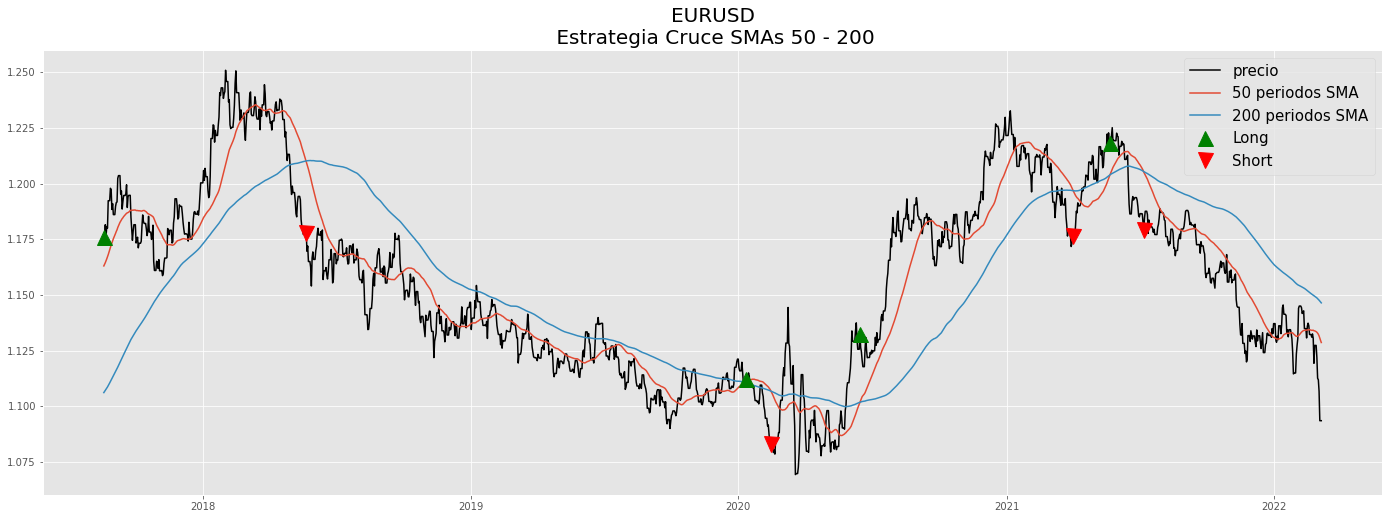

In [43]:
bkbase.Estrategia_Cruce_SMAs(50, 200)

Ahora vamos a correr la estrategia **sin** spread, para posteriormente ver de cuanto es la diferencia que el spread causa en el balance final.

In [44]:
bkbase = BacktesterIterativo('EURUSD', '2017-01-31', '2022-03-05', 10000, usar_spread=False)

----------------------------------------------------------------------------------------------------
TESTANDO LA ESTRATEGIA: Cruce de SMAs | EURUSD | sma_rapida: 50 | sma_lenta: 200
----------------------------------------------------------------------------------------------------
2017-08-18 | Comprando: 8502, EURUSD, por: 1.17606
2018-05-21 | Vendiendo: 8502, EURUSD, por: 1.17788
2018-05-21 | Vendiendo: 8502, EURUSD, por: 1.17788
2020-01-11 | Comprando: 8502, EURUSD, por: 1.1121
2020-01-11 | Comprando: 9508, EURUSD, por: 1.1121
2020-02-14 | Vendiendo: 9508, EURUSD, por: 1.08315
2020-02-14 | Vendiendo: 9508, EURUSD, por: 1.08315
2020-06-14 | Comprando: 9508, EURUSD, por: 1.13232
2020-06-14 | Comprando: 8683, EURUSD, por: 1.13232
2021-04-01 | Vendiendo: 8683, EURUSD, por: 1.17624
2021-04-01 | Vendiendo: 8683, EURUSD, por: 1.17624
2021-05-21 | Comprando: 8683, EURUSD, por: 1.21805
2021-05-21 | Comprando: 8086, EURUSD, por: 1.21805
2021-07-06 | Vendiendo: 8086, EURUSD, por: 1.17906
2021-

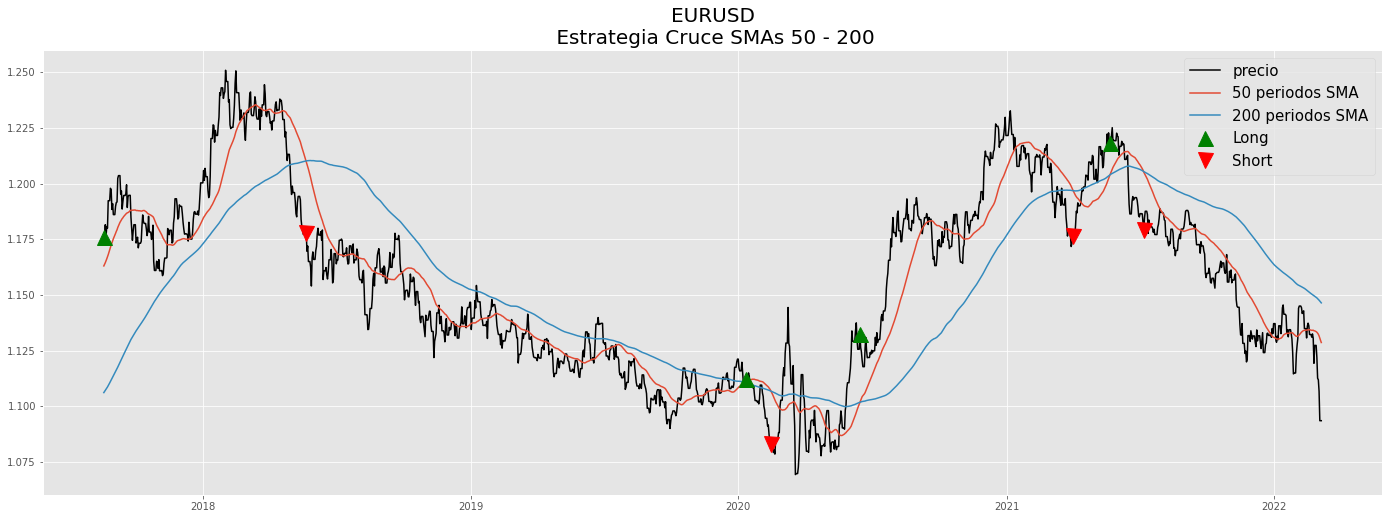

In [45]:
bkbase.Estrategia_Cruce_SMAs(50, 200)

In [46]:
# Diferencia en el resultado del saldo actual al hacer backtesting con y sin spread
9966.77 - 10227.02

-260.25